# 전국 자동차 검사소 표준데이터

'자동차관리법'에 따라 국토교육부 장관이 지정한 자동차검사소 정보, <br>
전국에 있는 자동차 검사소의 위치와, 검사기술 인력 수, 자동차의 어떤부분을 점검하는지 <br>
matplotlib, seaborn로 시각화를 해봅니다.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font',family='Malgun Gothic') # 한글폰트 설정

In [4]:
df = pd.read_csv("전국자동차검사소표준데이터.csv",engine='python',encoding='euc-kr')

* 데이터 프레임의 테이블 확인

In [5]:
df.head()

,자동차검사소명,자동차검사소유형,소재지도로명주소,소재지지번주소,위도,경도,검사소전화번호,운영시간,검사진로수,부지면적,...,튜닝검사여부,임시검사여부,수리검사여부,배출가스정밀검사여부,택시미터검정여부,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
0,삼우자동차정비(합),민간,대전광역시 대덕구 대화로101,NaN,36.366075,127.408805,042-627-5600,평일09:00-18:00+토요일09:00-13:00,1,3610.0,...,N,N,N,Y,Y,042-270-5851,대전광역시청,2021-10-26,6300000,대전광역시
1,새한현대서비스㈜,민간,대전광역시 대덕구 대전로1324,NaN,36.372107,127.420805,042-634-1122,평일09:00-18:00+토요일09:00-13:00,1,3373.0,...,N,N,N,Y,Y,042-270-5851,대전광역시청,2021-10-26,6300000,대전광역시
2,신대덕자동차공업사,민간,대전광역시 대덕구 한남로 138번길 12,NaN,36.348268,127.414951,042-623-7700,평일09:00-18:00+토요일09:00-13:00,1,1444.0,...,N,N,N,Y,Y,042-270-5851,대전광역시청,2021-10-26,6300000,대전광역시
3,포항자동차정비,민간,경상북도 포항시 북구 새마을로 124 (용흥동),NaN,36.042925,129.347457,054-272-4614,평일09:00~18:00+토요일 09:00~12:00,1,1309.0,...,N,N,N,Y,N,NaN,한국교통안전공단 대구경북본부,2023-03-28,5020000,경상북도 포항시
4,양덕종합모터스,민간,경상북도 포항시 북구 흥해읍 삼흥로502번길 40,NaN,36.103024,129.371592,054-253-3651,평일09:00~18:00+토요일 09:00~15:30,1,8962.0,...,N,Y,N,Y,Y,NaN,한국교통안전공단 대구경북본부,2023-03-28,5020000,경상북도 포항시


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 24 columns):
자동차검사소명       820 non-null object
자동차검사소유형      820 non-null object
소재지도로명주소      791 non-null object
소재지지번주소       484 non-null object
위도            820 non-null float64
경도            820 non-null float64
검사소전화번호       820 non-null object
운영시간          820 non-null object
검사진로수         820 non-null int64
부지면적          820 non-null float64
건물면적          820 non-null float64
검사기술인력수       474 non-null float64
신규검사여부        820 non-null object
정기검사여부        820 non-null object
튜닝검사여부        820 non-null object
임시검사여부        820 non-null object
수리검사여부        820 non-null object
배출가스정밀검사여부    820 non-null object
택시미터검정여부      820 non-null object
관리기관전화번호      668 non-null object
관리기관명         820 non-null object
데이터기준일자       820 non-null object
제공기관코드        820 non-null object
제공기관명         820 non-null object
dtypes: float64(5), int64(1), object(18)
memory usage: 153.8+ KB


In [7]:
df.columns

Index(['자동차검사소명', '자동차검사소유형', '소재지도로명주소', '소재지지번주소', '위도', '경도', '검사소전화번호',
       '운영시간', '검사진로수', '부지면적', '건물면적', '검사기술인력수', '신규검사여부', '정기검사여부',
       '튜닝검사여부', '임시검사여부', '수리검사여부', '배출가스정밀검사여부', '택시미터검정여부', '관리기관전화번호',
       '관리기관명', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

* 분석에 필요한 컬럼만 가지고 새로운 데이터 프레임을 생성합니다.

In [8]:
columns=['자동차검사소유형','소재지지번주소','제공기관명','검사기술인력수','위도', '경도','신규검사여부', '정기검사여부','튜닝검사여부', '임시검사여부', '수리검사여부', '배출가스정밀검사여부', '택시미터검정여부']

In [9]:
df = df[columns].copy()
df.head()

,자동차검사소유형,소재지지번주소,제공기관명,검사기술인력수,위도,경도,신규검사여부,정기검사여부,튜닝검사여부,임시검사여부,수리검사여부,배출가스정밀검사여부,택시미터검정여부
0,민간,NaN,대전광역시,3.0,36.366075,127.408805,Y,Y,N,N,N,Y,Y
1,민간,NaN,대전광역시,4.0,36.372107,127.420805,Y,Y,N,N,N,Y,Y
2,민간,NaN,대전광역시,3.0,36.348268,127.414951,Y,Y,N,N,N,Y,Y
3,민간,NaN,경상북도 포항시,NaN,36.042925,129.347457,N,Y,N,N,N,Y,N
4,민간,NaN,경상북도 포항시,NaN,36.103024,129.371592,Y,Y,N,Y,N,Y,Y


* 결측값을 확인 해 봅니다

In [10]:
df.isnull().sum()

자동차검사소유형        0
소재지지번주소       336
제공기관명           0
검사기술인력수       346
위도              0
경도              0
신규검사여부          0
정기검사여부          0
튜닝검사여부          0
임시검사여부          0
수리검사여부          0
배출가스정밀검사여부      0
택시미터검정여부        0
dtype: int64

* 분석에 필요할 '검사기술인력수' 컬럼에 결측값이 많지만, 숫자 타입이여서 0값으로 결측값을 대체 합니다

In [11]:
dict = {'검사기술인력수':0}

In [12]:
df = df.fillna(value=dict).copy()
df.head()

,자동차검사소유형,소재지지번주소,제공기관명,검사기술인력수,위도,경도,신규검사여부,정기검사여부,튜닝검사여부,임시검사여부,수리검사여부,배출가스정밀검사여부,택시미터검정여부
0,민간,NaN,대전광역시,3.0,36.366075,127.408805,Y,Y,N,N,N,Y,Y
1,민간,NaN,대전광역시,4.0,36.372107,127.420805,Y,Y,N,N,N,Y,Y
2,민간,NaN,대전광역시,3.0,36.348268,127.414951,Y,Y,N,N,N,Y,Y
3,민간,NaN,경상북도 포항시,0.0,36.042925,129.347457,N,Y,N,N,N,Y,N
4,민간,NaN,경상북도 포항시,0.0,36.103024,129.371592,Y,Y,N,Y,N,Y,Y


* 검사기술인력수에 소수점을 제거하기 위해 int로 변환 합니다

In [13]:
df['검사기술인력수'] = df['검사기술인력수'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 13 columns):
자동차검사소유형      820 non-null object
소재지지번주소       484 non-null object
제공기관명         820 non-null object
검사기술인력수       820 non-null int32
위도            820 non-null float64
경도            820 non-null float64
신규검사여부        820 non-null object
정기검사여부        820 non-null object
튜닝검사여부        820 non-null object
임시검사여부        820 non-null object
수리검사여부        820 non-null object
배출가스정밀검사여부    820 non-null object
택시미터검정여부      820 non-null object
dtypes: float64(2), int32(1), object(10)
memory usage: 80.2+ KB


In [14]:
df.head()

,자동차검사소유형,소재지지번주소,제공기관명,검사기술인력수,위도,경도,신규검사여부,정기검사여부,튜닝검사여부,임시검사여부,수리검사여부,배출가스정밀검사여부,택시미터검정여부
0,민간,NaN,대전광역시,3,36.366075,127.408805,Y,Y,N,N,N,Y,Y
1,민간,NaN,대전광역시,4,36.372107,127.420805,Y,Y,N,N,N,Y,Y
2,민간,NaN,대전광역시,3,36.348268,127.414951,Y,Y,N,N,N,Y,Y
3,민간,NaN,경상북도 포항시,0,36.042925,129.347457,N,Y,N,N,N,Y,N
4,민간,NaN,경상북도 포항시,0,36.103024,129.371592,Y,Y,N,Y,N,Y,Y


* 제공기관명 컬럼으로 중요 시도만 추출

In [15]:
# Name 열에서 공백 이전의 문자열을 출력하는 반복문
for index, row in df.iterrows():
    df.loc[index,'지역'] = row['제공기관명'].split()[0]  # 공백으로 문자열을 분리하고 첫 번째 요소를 선택
df.head()

,자동차검사소유형,소재지지번주소,제공기관명,검사기술인력수,위도,경도,신규검사여부,정기검사여부,튜닝검사여부,임시검사여부,수리검사여부,배출가스정밀검사여부,택시미터검정여부,지역
0,민간,NaN,대전광역시,3,36.366075,127.408805,Y,Y,N,N,N,Y,Y,대전광역시
1,민간,NaN,대전광역시,4,36.372107,127.420805,Y,Y,N,N,N,Y,Y,대전광역시
2,민간,NaN,대전광역시,3,36.348268,127.414951,Y,Y,N,N,N,Y,Y,대전광역시
3,민간,NaN,경상북도 포항시,0,36.042925,129.347457,N,Y,N,N,N,Y,N,경상북도
4,민간,NaN,경상북도 포항시,0,36.103024,129.371592,Y,Y,N,Y,N,Y,Y,경상북도


In [16]:
df['자동차검사소유형'].unique()

array(['민간', '공공'], dtype=object)

In [17]:
df['지역'].unique()

array(['대전광역시', '경상북도', '전라남도', '서울특별시', '강원도', '전라북도', '경기도', '강원특별자치도',
       '경상남도', '인천광역시', '충청남도', '부산광역시', '충청북도', '한국교통안전공단', '제주특별자치도',
       '광주광역시'], dtype=object)

* 지역명에 '한국교통안전공단'이 포함된게 확인 됨
* 지역이 '한국교통안전공단' 인 데이터만 추출하여, '소재지번주소' 컬럼의 앞부분을 발췌할 예정
* 강원도가 얼마전에 '강원특별자치도'로 승급되었지만, 일부 데이터에 아직 강원도가 남아 있는 것을 확인함
* '소재지번주소' 컬럼으로 강원도를 강원특별자치도로 변환할 작업 준비

In [18]:
print(df['소재지지번주소'])

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
5                          NaN
6                          NaN
7                          NaN
8                          NaN
9                          NaN
10                         NaN
11                         NaN
12         전라남도 곡성군 오산면 운곡리 19
13          경상북도 김천시 신음동 100-1
14          경상북도 김천시 신음동 569-1
15          경상북도 김천시 응명동 895-1
16            경상북도 김천시 황금동 129
17          경상북도 김천시 평화동 70-16
18          경상북도 김천시 남면 초곡리 97
19           경상북도 김천시 신음동 78-3
20          경상북도 김천시 응명동 708-1
21       경상북도 김천시 아포읍 국사리 59-5
22           경상북도 문경시 점촌동 11-1
23            경상북도 문경시 윤직동 587
24            경상북도 문경시 모전동 524
25      경상북도 문경시 마성면 남호리 305-2
26           경상북도 문경시 신기동 1106
27            경상북도 문경시 윤직동 538
28        경상북도 문경시 영순면 김용리 144
29         서울특별시 관악구 봉천동 912-8
                ...           
790     경상남도 하동군 금남면 계천리 911-1
791     

In [19]:
df.loc[np.where(df['지역']=='한국교통안전공단')]

,자동차검사소유형,소재지지번주소,제공기관명,검사기술인력수,위도,경도,신규검사여부,정기검사여부,튜닝검사여부,임시검사여부,수리검사여부,배출가스정밀검사여부,택시미터검정여부,지역
314,공공,대전광역시 서구 변동51-1,한국교통안전공단,0,36.324841,127.377910,Y,Y,Y,Y,Y,Y,Y,한국교통안전공단
315,공공,경기도 화성시 영천동120-5,한국교통안전공단,0,37.217278,127.095392,Y,Y,Y,Y,Y,Y,Y,한국교통안전공단
316,공공,강원특별자치도 동해시 단봉동271-7,한국교통안전공단,0,37.475036,129.119530,Y,Y,Y,Y,Y,N,Y,한국교통안전공단
317,공공,전라남도 목포시 상동713-22,한국교통안전공단,0,34.811941,126.422788,Y,Y,Y,Y,Y,Y,Y,한국교통안전공단
318,공공,경상북도 문경시 점촌동17-1,한국교통안전공단,0,36.593178,128.208497,Y,Y,Y,Y,Y,N,Y,한국교통안전공단
319,공공,경기도 부천시 삼정동29-4,한국교통안전공단,0,37.524593,126.765054,Y,Y,Y,Y,Y,Y,Y,한국교통안전공단
320,공공,광주광역시 광산구 도천동1-9,한국교통안전공단,0,35.218340,126.825108,Y,Y,Y,Y,Y,Y,Y,한국교통안전공단
321,공공,부산광역시 사하구 신평동572,한국교통안전공단,0,35.086085,128.974731,Y,Y,Y,Y,Y,Y,Y,한국교통안전공단
322,공공,서울특별시 마포구 상암동1733,한국교통안전공단,0,37.586492,126.884090,Y,Y,Y,Y,Y,Y,Y,한국교통안전공단
323,공공,경기도 수원시 권선구 서둔동9-19,한국교통안전공단,0,37.270629,126.996160,Y,Y,Y,Y,Y,Y,Y,한국교통안전공단


In [20]:
df['위치'] = np.where(df['지역'] == '한국교통안전공단',
                     df['소재지지번주소'].str.split().str[0],
                     df['지역'])
df.loc[314,'위치']

'대전광역시'

In [21]:
df['위치'] = df['위치'].replace('강원도', '강원특별자치도')

# 전처리 완료된 데이터프레임 df

In [22]:
df = df[['자동차검사소유형','위치','검사기술인력수','위도','경도','신규검사여부','정기검사여부','튜닝검사여부','임시검사여부','수리검사여부','배출가스정밀검사여부','택시미터검정여부']].copy()
df.head()

,자동차검사소유형,위치,검사기술인력수,위도,경도,신규검사여부,정기검사여부,튜닝검사여부,임시검사여부,수리검사여부,배출가스정밀검사여부,택시미터검정여부
0,민간,대전광역시,3,36.366075,127.408805,Y,Y,N,N,N,Y,Y
1,민간,대전광역시,4,36.372107,127.420805,Y,Y,N,N,N,Y,Y
2,민간,대전광역시,3,36.348268,127.414951,Y,Y,N,N,N,Y,Y
3,민간,경상북도,0,36.042925,129.347457,N,Y,N,N,N,Y,N
4,민간,경상북도,0,36.103024,129.371592,Y,Y,N,Y,N,Y,Y


# matplotlib로 시각화

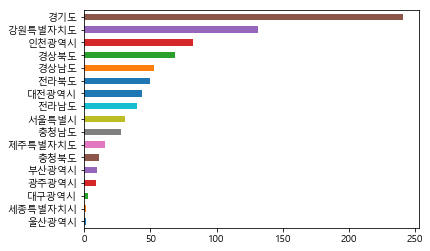

In [23]:
df['위치'].value_counts().sort_values(ascending=True).plot.barh()

In [24]:
df['위치'].sort_values(ascending=False).value_counts()

경기도        241
강원특별자치도    131
인천광역시       82
경상북도        69
경상남도        53
전라북도        50
대전광역시       44
전라남도        40
서울특별시       31
충청남도        28
제주특별자치도     16
충청북도        11
부산광역시       10
광주광역시        9
대구광역시        3
세종특별자치시      1
울산광역시        1
Name: 위치, dtype: int64

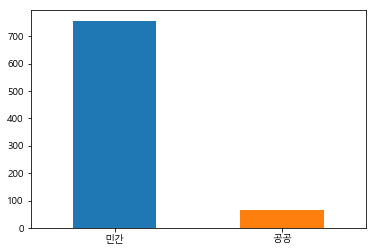

In [25]:
df['자동차검사소유형'].value_counts().sort_values(ascending=False).plot.bar(rot=360)

In [26]:
df['자동차검사소유형'].sort_values(ascending=False).value_counts()

민간    756
공공     64
Name: 자동차검사소유형, dtype: int64

# seaborn으로 시각화 해 봅니다.

In [27]:
order = df['위치'].value_counts().sort_values(ascending=False).index
order

Index(['경기도', '강원특별자치도', '인천광역시', '경상북도', '경상남도', '전라북도', '대전광역시', '전라남도',
       '서울특별시', '충청남도', '제주특별자치도', '충청북도', '부산광역시', '광주광역시', '대구광역시',
       '세종특별자치시', '울산광역시'],
      dtype='object')

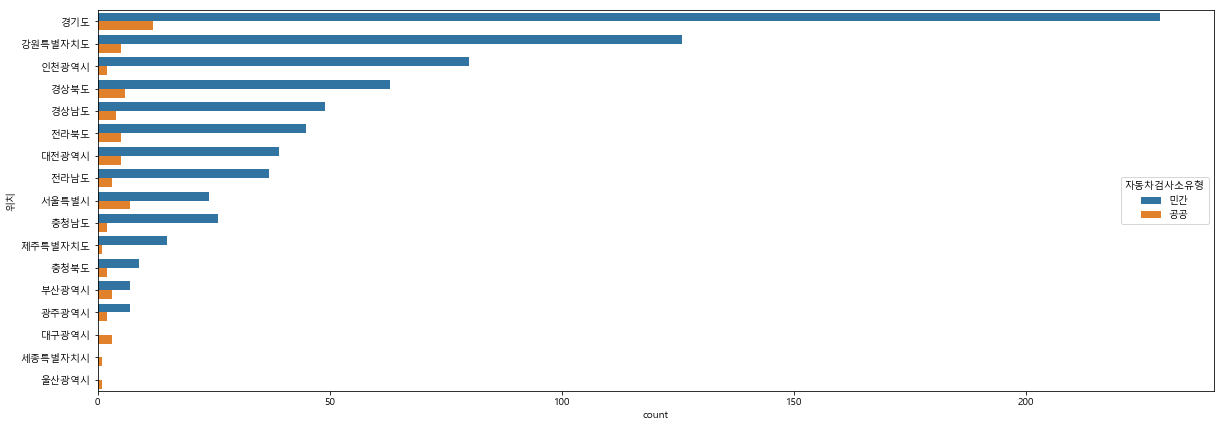

In [28]:
plt.figure(figsize=(20,7))
sns.countplot(data=df,y='위치',hue='자동차검사소유형',order=order)

In [29]:
df['위치'].sort_values(ascending=False).value_counts()

경기도        241
강원특별자치도    131
인천광역시       82
경상북도        69
경상남도        53
전라북도        50
대전광역시       44
전라남도        40
서울특별시       31
충청남도        28
제주특별자치도     16
충청북도        11
부산광역시       10
광주광역시        9
대구광역시        3
세종특별자치시      1
울산광역시        1
Name: 위치, dtype: int64

In [30]:
df['자동차검사소유형'].sort_values(ascending=False).value_counts()

민간    756
공공     64
Name: 자동차검사소유형, dtype: int64

In [31]:
df['신규검사여부'].sort_values(ascending=False).value_counts()

N    564
Y    256
Name: 신규검사여부, dtype: int64

In [32]:
df['정기검사여부'].sort_values(ascending=False).value_counts()

Y    819
N      1
Name: 정기검사여부, dtype: int64

In [33]:
df['튜닝검사여부'].sort_values(ascending=False).value_counts()

N    691
Y    129
Name: 튜닝검사여부, dtype: int64

In [34]:
df['임시검사여부'].sort_values(ascending=False).value_counts()

N    514
Y    306
Name: 임시검사여부, dtype: int64

In [35]:
df['수리검사여부'].sort_values(ascending=False).value_counts()

N    600
Y    220
Name: 수리검사여부, dtype: int64

In [36]:
df['배출가스정밀검사여부'].sort_values(ascending=False).value_counts()

Y    533
N    287
Name: 배출가스정밀검사여부, dtype: int64

In [37]:
df['택시미터검정여부'].sort_values(ascending=False).value_counts()

Y    603
N    217
Name: 택시미터검정여부, dtype: int64

# 검사인력수에 대한 데이터프레임 생성

In [38]:
human = df[['위치','자동차검사소유형','검사기술인력수']].copy()

In [39]:
human.head()

,위치,자동차검사소유형,검사기술인력수
0,대전광역시,민간,3
1,대전광역시,민간,4
2,대전광역시,민간,3
3,경상북도,민간,0
4,경상북도,민간,0


In [40]:
human.pivot_table(values='검사기술인력수',index=['위치','자동차검사소유형'])

검사기술인력수
위치      자동차검사소유형          
강원특별자치도 공공        0.000000
        민간        1.603175
경기도     공공        1.333333
        민간        1.314410
경상남도    공공        0.000000
        민간        1.816327
경상북도    공공        0.000000
        민간        0.746032
광주광역시   공공        0.000000
        민간        2.857143
대구광역시   공공        0.000000
대전광역시   공공        4.200000
        민간        3.128205
부산광역시   공공        0.000000
        민간        2.571429
서울특별시   공공        0.000000
        민간        3.541667
세종특별자치시 공공        0.000000
울산광역시   공공        0.000000
인천광역시   공공        0.000000
        민간        0.687500
전라남도    공공        0.000000
        민간        1.918919
전라북도    공공        0.000000
        민간        1.288889
제주특별자치도 공공        0.000000
        민간        0.000000
충청남도    공공        0.000000
        민간        2.769231
충청북도    공공        0.000000
        민간        1.666667

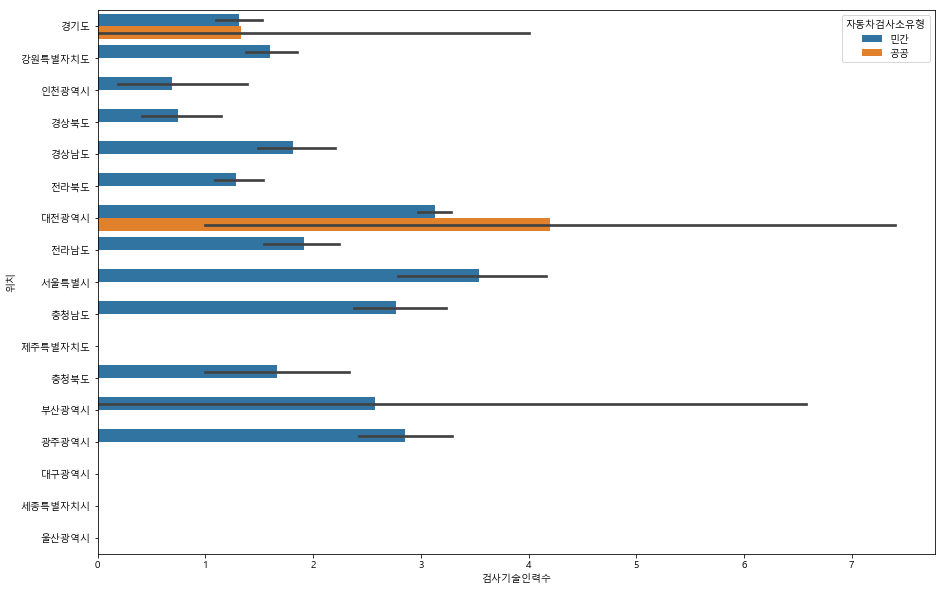

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(data=human, y='위치',x='검사기술인력수',hue='자동차검사소유형',order=order)

* 경기도와 대전을 제외하고 공공검사 인력수가 없음을 볼 수 있다...

# 위도 경도로 위치 scatterplot 생성

In [42]:
loc = df[['위도','경도','위치']].copy()
loc.head()

,위도,경도,위치
0,36.366075,127.408805,대전광역시
1,36.372107,127.420805,대전광역시
2,36.348268,127.414951,대전광역시
3,36.042925,129.347457,경상북도
4,36.103024,129.371592,경상북도


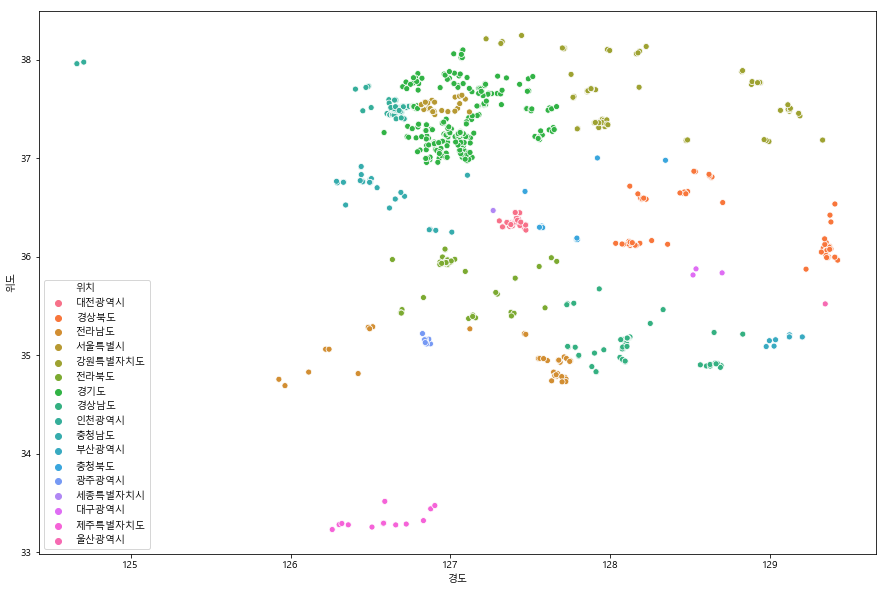

In [43]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=loc, x='경도',y='위도',hue='위치')